In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.1.0
sys.version_info(major=3, minor=6, micro=10, releaselevel='final', serial=0)
matplotlib 3.1.3
numpy 1.18.1
sklearn 0.22.1
tensorflow 2.1.0
keras 2.3.1


Using TensorFlow backend.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]
print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [ ]:
print(np.max(x_train_scaled))

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Sgd",
              metrics=["accuracy"])
model.layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [5]:
logdir = os.path.join("callbacks" )
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                   save_best_only = True),
    keras.callbacks.EarlyStopping(patience = 5,min_delta = 1e-3)
]
history = model.fit(x_train_scaled,y_train,epochs=10,
                    validation_data=(x_valid_scaled,y_valid),
                    callbacks = callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
 2592/55000 [>.............................] - ETA: 9s - loss: 1.2402 - accuracy: 0.5976 

E:\Anaconda3\envs\tf\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.116708). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


55000/55000 [==============================] - 4s 65us/step - loss: 0.5421 - accuracy: 0.8101 - val_loss: 0.4067 - val_accuracy: 0.8602
Epoch 2/10
55000/55000 [==============================] - 3s 55us/step - loss: 0.3933 - accuracy: 0.8578 - val_loss: 0.3633 - val_accuracy: 0.8686
Epoch 3/10
55000/55000 [==============================] - 3s 56us/step - loss: 0.3540 - accuracy: 0.8717 - val_loss: 0.3474 - val_accuracy: 0.8726
Epoch 4/10
55000/55000 [==============================] - 4s 64us/step - loss: 0.3289 - accuracy: 0.8798 - val_loss: 0.3361 - val_accuracy: 0.8782
Epoch 5/10
55000/55000 [==============================] - 3s 63us/step - loss: 0.3096 - accuracy: 0.8868 - val_loss: 0.3295 - val_accuracy: 0.8794
Epoch 6/10
55000/55000 [==============================] - 3s 61us/step - loss: 0.2930 - accuracy: 0.8940 - val_loss: 0.3117 - val_accuracy: 0.8864
Epoch 7/10
55000/55000 [==============================] - 3s 55us/step - loss: 0.2794 - accuracy: 0.8987 - val_loss: 0.3139 - val

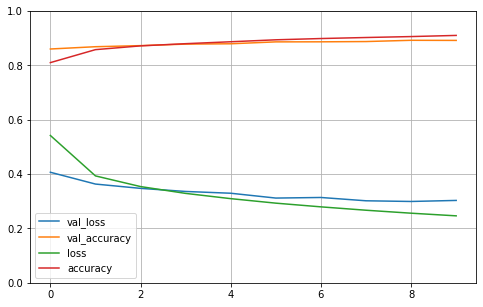

In [6]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)
    